Data Visualization Assignment 7
10/30/24

In [3]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Part 1: Matplotlib

1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

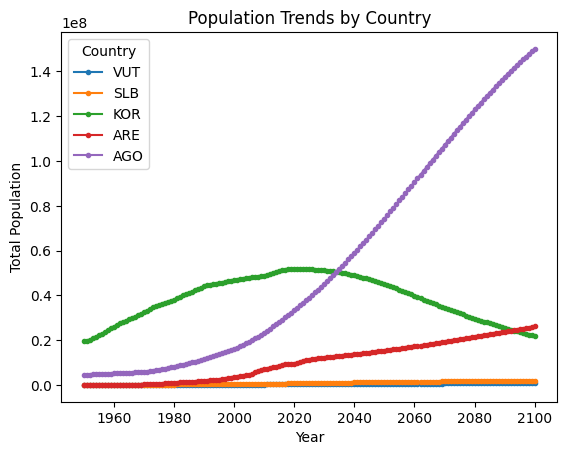

In [77]:
data = {
    "VUT": 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vut--age--gender--year.csv',
    "SLB": 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-slb--age--gender--year.csv',
    "KOR": 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-kor--age--gender--year.csv',
    "ARE": 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-are--age--gender--year.csv',
    "AGO": 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ago--age--gender--year.csv'
}

dataf = pd.DataFrame()
                     
for fname, i in data.items():
    df = pd.read_csv(i)
    df = df.groupby('year')['population'].sum().reset_index()
    df['country'] = fname

    dataf = pd.concat([dataf, df])
    
    #total_population = df.groupby('year')['population'].sum()
    #dataf = pd.concat([dataf, total_population])

#print(dataf)

for country in data.keys():
    country_data = dataf[dataf['country'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='.', label=country)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends by Country')
plt.legend(title='Country')


2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

Text(0, 0.5, 'Population')

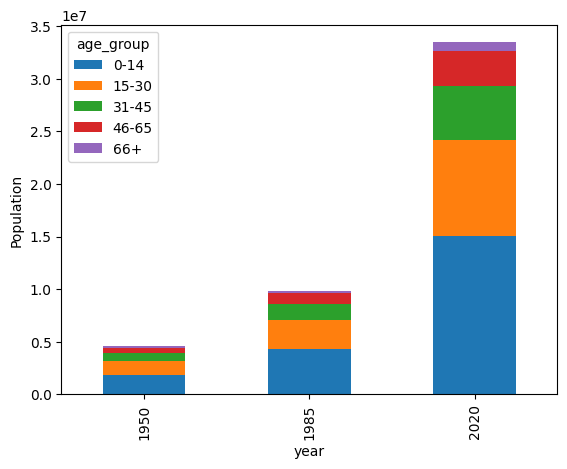

In [83]:
dataf2 = pd.DataFrame()
                     
for fname2, j in data.items():
    df2 = pd.read_csv(j)
    df2['country'] = fname2

dataf2 = pd.concat([dataf2, df2])

years = [1950, 1985, 2020]
filter_df = dataf2[dataf2['year'].isin(years)]
#print(filter_df)

age_dist = {
    '0-14': filter_df[(filter_df['age'] <= 14)],
    '15-30': filter_df[(filter_df['age'] > 14) & (filter_df['age'] <= 30)],
    '31-45': filter_df[(filter_df['age'] > 30) & (filter_df['age'] <= 45)],
    '46-65': filter_df[(filter_df['age'] > 45) & (filter_df['age'] <= 65)],
    '66+': filter_df[(filter_df['age'] > 65)]
}

plt_df = []
for group, k in age_dist.items():
    pop_sum = k.groupby('year')['population'].sum().reset_index()
    pop_sum['age_group'] = group
    plt_df.append(pop_sum)

plt_df = pd.concat(plt_df)
pivot_df = plt_df.pivot(index='year', columns='age_group', values='population').fillna(0)

#print(pivot_df)
pivot_df.plot(kind='bar', stacked=True)
plt.ylabel('Population')

#sns too hard
#sns.barplot(data=pivot_df, x='year')

#for d, k in age_dist.items():
    #print(k)
    #sns.barplot(data=k, x='year', y='age')